Este projeto tem como objetivo prever a satisfação de um cliente do banco santander. No dataset oferecido pelo kaggle existem diversas features onde o maior desafio é realizar uma boa feature selection para poder descobrir o melhor resultado para o problema.

Vamos começar a nossa análise carregando as bibliotecas básicas para análise exploratória e em seguidas iremos carregar o dataset e ver algumas informações primordiais.

In [1]:
#Bibliotecas para ler o dataframe e manipular os dados.
import pandas as pd
import numpy as np

#Bibliotecas para construir gráficos em Python.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Permite ver todas as colunas e linhas do dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Carregando o dataset
df = pd.read_csv("train.csv")
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

O arquivo possui muitas colunas, mas pela descrição todas são numéricas. Nesta análise exploratória vamos ver quais delas possui valores nulos. Também vamos verificar a correlação entre elas, fazer uma feature selection para descobrir quais são as features mais relevantes ao problema.

In [4]:
df.shape

(76020, 371)

In [5]:
df.isna().sum()

ID                               0
var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0          

Como podemos perceber não há nenhum valor nulo neste dataset, mas vendo o head percebo muitos valores 0 nas features. Vamos analizar o dataset para ver se existem colunas com apenas um valor.

In [6]:
cols_0 = df.columns[df.nunique() <= 1]
len(cols_0)

34

Existem 34 colunas que possuem um único elemento. Para fins de análise preditiva isso não vai ajudar em nada, por isso serão excluídos do dataset.

In [7]:
cols_list_0 = cols_0.tolist()
df_columns = df.columns.tolist()
cols_list = list(set(df_columns) - set(cols_list_0))
len(cols_list)

337

In [8]:
df_01 = df[cols_list]

In [9]:
df_01.head()

,num_op_var41_comer_ult3,delta_imp_reemb_var33_1y3,ind_var33_0,num_var24_0,num_var39,ind_var18,imp_op_var40_efect_ult3,ind_var25_cte,num_trasp_var33_in_hace3,num_op_var40_efect_ult1,ind_var34,ind_var32,saldo_var32,saldo_var13,saldo_medio_var5_hace3,ind_var19,num_venta_var44_ult1,num_op_var39_hace2,var36,num_var45_ult3,ind_var6,num_var32,saldo_var12,imp_op_var41_comer_ult3,saldo_var40,saldo_medio_var29_ult3,delta_imp_amort_var34_1y3,num_op_var41_comer_ult1,num_reemb_var17_hace3,num_var44_0,num_var12_0,saldo_var37,delta_imp_aport_var13_1y3,num_meses_var5_ult3,ind_var18_0,imp_aport_var33_hace3,num_meses_var44_ult3,num_var43_emit_ult1,num_var13_0,delta_num_aport_var17_1y3,num_var18_0,imp_reemb_var17_hace3,num_op_var39_efect_ult1,ind_var13_corto_0,num_var34,saldo_medio_var33_ult3,ind_var1,ind_var40,delta_imp_venta_var44_1y3,saldo_medio_var13_largo_ult3,num_var45_hace2,num_var13_largo,num_var7_emit_ult1,imp_op_var41_ult1,ind_var30,saldo_medio_var13_largo_ult1,num_var4,saldo_medio_var5_ult3,saldo_var34,saldo_medio_var13_corto_ult1,ind_var14_0,saldo_var42,imp_aport_var17_ult1,saldo_medio_var13_corto_hace3,num_var13_corto_0,num_var6,num_op_var41_hace2,delta_imp_compra_var44_1y3,num_op_var41_efect_ult3,num_trasp_var33_in_ult1,num_var13_corto,num_reemb_var17_ult1,imp_aport_var13_ult1,saldo_medio_var8_ult1,num_op_var39_hace3,ind_var13_largo,num_var7_recib_ult1,num_var41_0,num_var1_0,num_var31_0,num_var40,imp_trasp_var17_in_hace3,delta_imp_amort_var18_1y3,delta_imp_aport_var33_1y3,delta_num_reemb_var33_1y3,ind_var13_largo_0,delta_num_aport_var33_1y3,num_trasp_var33_out_ult1,delta_num_reemb_var17_1y3,saldo_medio_var17_hace2,ind_var20_0,num_var42,num_op_var40_ult1,saldo_medio_var13_largo_hace2,num_reemb_var33_ult1,saldo_medio_var33_ult1,ind_var24_0,num_var26,num_meses_var39_vig_ult3,num_var42_0,imp_compra_var44_ult1,delta_num_trasp_var17_out_1y3,num_aport_var17_hace3,ind_var39,imp_amort_var34_ult1,num_var30_0,num_var45_ult1,imp_reemb_var17_ult1,delta_imp_reemb_var17_1y3,num_op_var40_ult3,saldo_medio_var12_hace3,saldo_medio_var13_largo_hace3,ind_var20,num_var14,num_var32_0,num_var29,imp_op_var40_comer_ult1,saldo_medio_var44_ult1,num_trasp_var17_in_ult1,saldo_var44,saldo_medio_var33_hace2,ind_var31_0,saldo_medio_var12_ult1,ind_var26,imp_op_var40_efect_ult1,saldo_var14,imp_var7_recib_ult1,num_compra_var44_hace3,num_med_var45_ult3,num_var31,num_var17,num_var22_hace3,num_aport_var33_ult1,imp_op_var39_efect_ult1,imp_sal_var16_ult1,num_var37_med_ult2,imp_ent_var16_ult1,num_var8_0,ind_var12,num_aport_var13_ult1,ind_var13_medio_0,num_op_var39_ult1,num_var26_0,ind_var33,num_var13_medio_0,num_var13,imp_op_var41_efect_ult3,var21,saldo_var1,ind_var31,num_meses_var13_corto_ult3,num_op_var39_comer_ult1,var15,num_var20_0,saldo_medio_var13_corto_hace2,ind_var37_cte,saldo_var13_medio,ind_var40_0,saldo_medio_var17_hace3,num_var22_ult1,num_var30,saldo_medio_var44_ult3,saldo_var6,saldo_var18,imp_op_var40_comer_ult3,saldo_var20,num_var5_0,ind_var32_0,num_op_var41_efect_ult1,num_var6_0,num_trasp_var17_out_ult1,num_op_var41_ult1,saldo_var26,ind_var6_0,num_var20,num_var18,imp_reemb_var13_ult1,ind_var26_cte,saldo_var17,ind_var26_0,imp_venta_var44_ult1,saldo_medio_var29_hace2,imp_venta_var44_hace3,num_var33_0,saldo_var30,imp_trasp_var33_out_ult1,num_var43_recib_ult1,ind_var29_0,num_compra_var44_ult1,delta_imp_aport_var17_1y3,imp_op_var39_comer_ult3,ind_var37,saldo_var24,saldo_var13_corto,TARGET,num_var37,saldo_var31,saldo_medio_var44_hace2,ind_var12_0,ind_var44,num_meses_var13_medio_ult3,num_var12,ind_var17,num_meses_var17_ult3,delta_imp_trasp_var33_out_1y3,ind_var39_0,num_var33,imp_trasp_var33_in_ult1,num_var22_hace2,ind_var10cte_ult1,num_var8,imp_compra_var44_hace3,num_sal_var16_ult1,imp_var43_emit_ult1,imp_op_var39_efect_ult3,ind_var5,saldo_medio_var12_ult3,num_var1,num_meses_var33_ult3,ind_var9_ult1,saldo_medio_var44_hace3,ind_var30_0,ID,ind_var13_medio,delta_imp_trasp_var33_in_1y3,imp_trasp_var17_out_ult1,delta_imp_reemb_var13_1y3,saldo_var25,imp_op_var39_comer_u

Como este dataset possui muitas features fica um pouco complicada a análise exploratória através de gráficos, portanto para escolher as melhores features para nosso algoritmo vou utilizar algumas técnicas e fazer o treinamento do modelo. Logo neste caso quem fará a feature selction será o computador, mas com a ajuda de algumas técnicas.

# Correlação

A primeira técnica que irei utilizar será a correlação, que é muito utilizada para variáveis quantitativas e mostra qual é a relação existente entre duas variáveis. A correlação varia de -1 a 1, onde quanto mais próximo de -1 maior a correlação negativa, ou seja a diferença entre eles (ex: quando um sobe outro desce), e quanto mais próximo de 1, maior será a correlação positiva, ou seja maior a semelhança entre eles (ex: quando um sobe o outro também sobe). Portanto as melhores variáveis são aquelas mais próximas de -1 ou de 1. As que estão próximas de 0 siginifica que não existe quase nenhuma correlação entre elas.

In [10]:
matriz_corr = df_01.corr()
matriz_corr.head()

,num_op_var41_comer_ult3,delta_imp_reemb_var33_1y3,ind_var33_0,num_var24_0,num_var39,ind_var18,imp_op_var40_efect_ult3,ind_var25_cte,num_trasp_var33_in_hace3,num_op_var40_efect_ult1,ind_var34,ind_var32,saldo_var32,saldo_var13,saldo_medio_var5_hace3,ind_var19,num_venta_var44_ult1,num_op_var39_hace2,var36,num_var45_ult3,ind_var6,num_var32,saldo_var12,imp_op_var41_comer_ult3,saldo_var40,saldo_medio_var29_ult3,delta_imp_amort_var34_1y3,num_op_var41_comer_ult1,num_reemb_var17_hace3,num_var44_0,num_var12_0,saldo_var37,delta_imp_aport_var13_1y3,num_meses_var5_ult3,ind_var18_0,imp_aport_var33_hace3,num_meses_var44_ult3,num_var43_emit_ult1,num_var13_0,delta_num_aport_var17_1y3,num_var18_0,imp_reemb_var17_hace3,num_op_var39_efect_ult1,ind_var13_corto_0,num_var34,saldo_medio_var33_ult3,ind_var1,ind_var40,delta_imp_venta_var44_1y3,saldo_medio_var13_largo_ult3,num_var45_hace2,num_var13_largo,num_var7_emit_ult1,imp_op_var41_ult1,ind_var30,saldo_medio_var13_largo_ult1,num_var4,saldo_medio_var5_ult3,saldo_var34,saldo_medio_var13_corto_ult1,ind_var14_0,saldo_var42,imp_aport_var17_ult1,saldo_medio_var13_corto_hace3,num_var13_corto_0,num_var6,num_op_var41_hace2,delta_imp_compra_var44_1y3,num_op_var41_efect_ult3,num_trasp_var33_in_ult1,num_var13_corto,num_reemb_var17_ult1,imp_aport_var13_ult1,saldo_medio_var8_ult1,num_op_var39_hace3,ind_var13_largo,num_var7_recib_ult1,num_var41_0,num_var1_0,num_var31_0,num_var40,imp_trasp_var17_in_hace3,delta_imp_amort_var18_1y3,delta_imp_aport_var33_1y3,delta_num_reemb_var33_1y3,ind_var13_largo_0,delta_num_aport_var33_1y3,num_trasp_var33_out_ult1,delta_num_reemb_var17_1y3,saldo_medio_var17_hace2,ind_var20_0,num_var42,num_op_var40_ult1,saldo_medio_var13_largo_hace2,num_reemb_var33_ult1,saldo_medio_var33_ult1,ind_var24_0,num_var26,num_meses_var39_vig_ult3,num_var42_0,imp_compra_var44_ult1,delta_num_trasp_var17_out_1y3,num_aport_var17_hace3,ind_var39,imp_amort_var34_ult1,num_var30_0,num_var45_ult1,imp_reemb_var17_ult1,delta_imp_reemb_var17_1y3,num_op_var40_ult3,saldo_medio_var12_hace3,saldo_medio_var13_largo_hace3,ind_var20,num_var14,num_var32_0,num_var29,imp_op_var40_comer_ult1,saldo_medio_var44_ult1,num_trasp_var17_in_ult1,saldo_var44,saldo_medio_var33_hace2,ind_var31_0,saldo_medio_var12_ult1,ind_var26,imp_op_var40_efect_ult1,saldo_var14,imp_var7_recib_ult1,num_compra_var44_hace3,num_med_var45_ult3,num_var31,num_var17,num_var22_hace3,num_aport_var33_ult1,imp_op_var39_efect_ult1,imp_sal_var16_ult1,num_var37_med_ult2,imp_ent_var16_ult1,num_var8_0,ind_var12,num_aport_var13_ult1,ind_var13_medio_0,num_op_var39_ult1,num_var26_0,ind_var33,num_var13_medio_0,num_var13,imp_op_var41_efect_ult3,var21,saldo_var1,ind_var31,num_meses_var13_corto_ult3,num_op_var39_comer_ult1,var15,num_var20_0,saldo_medio_var13_corto_hace2,ind_var37_cte,saldo_var13_medio,ind_var40_0,saldo_medio_var17_hace3,num_var22_ult1,num_var30,saldo_medio_var44_ult3,saldo_var6,saldo_var18,imp_op_var40_comer_ult3,saldo_var20,num_var5_0,ind_var32_0,num_op_var41_efect_ult1,num_var6_0,num_trasp_var17_out_ult1,num_op_var41_ult1,saldo_var26,ind_var6_0,num_var20,num_var18,imp_reemb_var13_ult1,ind_var26_cte,saldo_var17,ind_var26_0,imp_venta_var44_ult1,saldo_medio_var29_hace2,imp_venta_var44_hace3,num_var33_0,saldo_var30,imp_trasp_var33_out_ult1,num_var43_recib_ult1,ind_var29_0,num_compra_var44_ult1,delta_imp_aport_var17_1y3,imp_op_var39_comer_ult3,ind_var37,saldo_var24,saldo_var13_corto,TARGET,num_var37,saldo_var31,saldo_medio_var44_hace2,ind_var12_0,ind_var44,num_meses_var13_medio_ult3,num_var12,ind_var17,num_meses_var17_ult3,delta_imp_trasp_var33_out_1y3,ind_var39_0,num_var33,imp_trasp_var33_in_ult1,num_var22_hace2,ind_var10cte_ult1,num_var8,imp_compra_var44_hace3,num_sal_var16_ult1,imp_var43_emit_ult1,imp_op_var39_efect_ult3,ind_var5,saldo_medio_var12_ult3,num_var1,num_meses_var33_ult3,ind_var9_ult1,saldo_medio_var44_hace3,ind_var30_0,ID,ind_var13_medio,delta_imp_trasp_var33_in_1y3,imp_trasp_var17_out_ult1,delta_imp_reemb_var13_1y3,saldo_var25,imp_op_var39_comer_u

A visualização dessa maneira fica ruim devido à grande quantidade de variáveis, portanto vamos selecioanr apenas a variável target e ordenar os valores.

In [11]:
TargetCorr = matriz_corr['TARGET']
TargetCorr.sort_values()

ind_var30                       -0.149811
num_meses_var5_ult3             -0.148253
num_var30                       -0.138289
num_var42                       -0.135693
ind_var5                        -0.135349
num_var5                        -0.134095
num_var4                        -0.080194
num_var35                       -0.076872
ind_var13                       -0.039612
ind_var13_0                     -0.039471
num_var13                       -0.038400
ind_var12_0                     -0.038215
num_var13_0                     -0.038045
saldo_var30                     -0.037092
ind_var39_0                     -0.035045
ind_var13_corto                 -0.034438
num_var13_corto                 -0.034432
num_meses_var13_corto_ult3      -0.034367
ind_var13_corto_0               -0.034337
ind_var12                       -0.034255
num_var13_corto_0               -0.034236
ind_var41_0                     -0.034149
num_var12                       -0.034108
num_var30_0                     -0

Dessa forma ficou mais clara a visualização, agora podemos colocar um critério para selecionar as variáveis. Neste caso vou esolher as variáveis que possuem correlação maior do que 0.01 e menor do que -0.01. Assim teremos em nosso data set as variaveis com maiores correlação positiva e negativa com a vairável TARGET.

In [12]:
vars_corr = []
for i in range(0,len(TargetCorr)):
    if TargetCorr[i] > 0.01:
        vars_corr.append(TargetCorr.index[i])
    elif TargetCorr[i] < -0.01:
        vars_corr.append(TargetCorr.index[i])
    else:
        0
len(vars_corr)

118

Desta forma conseguimos diminuir consideravelmente as variáveis com maior importancia. Vamos gerar o modelo de machine learning com essas variáveis e ver o resultado.

In [13]:
dfBestCorr = df_01.loc[:, vars_corr]
dfBestCorr.head()

,num_var24_0,imp_op_var40_efect_ult3,ind_var25_cte,num_op_var40_efect_ult1,saldo_var13,saldo_medio_var5_hace3,var36,saldo_var12,saldo_var40,num_var12_0,num_meses_var5_ult3,num_var13_0,num_op_var39_efect_ult1,ind_var13_corto_0,saldo_medio_var13_largo_ult3,num_var13_largo,imp_op_var41_ult1,ind_var30,saldo_medio_var13_largo_ult1,num_var4,saldo_medio_var5_ult3,saldo_medio_var13_corto_ult1,ind_var14_0,saldo_var42,saldo_medio_var13_corto_hace3,num_var13_corto_0,num_op_var41_efect_ult3,num_var13_corto,num_reemb_var17_ult1,ind_var13_largo,num_var41_0,ind_var13_largo_0,ind_var20_0,num_var42,saldo_medio_var13_largo_hace2,ind_var24_0,num_var26,num_meses_var39_vig_ult3,num_var42_0,num_var30_0,saldo_medio_var12_hace3,ind_var20,saldo_medio_var12_ult1,ind_var26,imp_op_var40_efect_ult1,imp_op_var39_efect_ult1,num_var8_0,ind_var12,num_op_var39_ult1,num_var26_0,num_var13,imp_op_var41_efect_ult3,num_meses_var13_corto_ult3,var15,num_var20_0,saldo_medio_var13_corto_hace2,num_var22_ult1,num_var30,num_var5_0,num_op_var41_efect_ult1,num_op_var41_ult1,num_var20,ind_var26_cte,ind_var26_0,saldo_var30,num_var43_recib_ult1,saldo_var24,saldo_var13_corto,TARGET,ind_var12_0,num_var12,ind_var39_0,num_var8,imp_op_var39_efect_ult3,ind_var5,saldo_medio_var12_ult3,imp_op_var39_comer_ult1,num_op_var41_ult3,var38,ind_var13_0,num_var22_ult3,ind_var24,num_var13_largo_0,imp_trans_var37_ult1,saldo_medio_var5_hace2,saldo_medio_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var12_ult3,ind_var5_0,num_op_var40_efect_ult3,ind_var8,ind_var43_recib_ult1,saldo_medio_var5_ult1,ind_var10_ult1,ind_var25_0,num_var35,ind_var41_0,ind_var13,ind_var13_corto,num_var25,num_op_var39_efect_ult3,num_var24,saldo_var13_largo,imp_aport_var13_hace3,ind_var25,imp_op_var41_comer_ult1,ind_var8_0,num_op_var39_ult3,num_aport_var13_hace3,imp_op_var41_efect_ult1,saldo_medio_var12_hace2,num_meses_var8_ult3,num_var5,num_var25_0,num_med_var22_ult3,saldo_var5,imp_op_var39_ult1,num_var39_0
0,0,0.0,0,0,0.0,0.00,99,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.00,0.0,0,0.00,0.00,0,0,0,0,0,3,0,0,0,0.0,0,0,2,3,3,0.0,0,0.00,0,0.0,0.0,0,0,0,0,0,0.0,0,23,0,0.0,0,0,3,0,0,0,0,0,0.00,0,0.0,0.0,0,0,0,1,0,0.0,0,0.00,0.0,0,39205.170000,0,0,0,0,0.0,0.00,0.00,0,0,1,0,0,0,0.00,0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.00,0.0,3
1,0,0.0,0,0,300.0,88.89,3,0.0,0.0,0,1,3,0,1,0.0,0,0.0,1,0.0,1,0.00,300.0,0,0.00,122.22,3,0,3,0,0,3,0,0,0,0.0,0,0,2,3,6,0.0,0,0.00,0,0.0,0.0,0,0,0,0,3,0.0,3,34,0,300.0,0,3,3,0,0,0,0,0,300.00,0,0.0,300.0,0,0,0,1,0,0.0,0,0.00,0.0,0,49278.030000,1,0,0,0,0.0,0.00,240.75,0,0,1,0,0,0,0.00,0,0,3,1,1,1,0,0,0,0.0,300.0,0,0.0,0,0,3,0.0,0.0,0,0,0,0,0.00,0.0,3
2,0,0.0,0,0,0.0,0.18,99,0.0,0.0,0,3,0,0,0,0.0,0,0.0,1,0.0,1,2.07,0.0,0,3.00,0.00,0,0,0,0,0,3,0,0,3,0.0,0,0,1,3,3,0.0,0,0.00,0,0.0,0.0,0,0,0,0,0,0.0,0,23,0,0.0,0,3,3,0,0,0,0,0,3.00,0,0.0,0.0,0,0,0,1,0,0.0,1,0.00,0.0,0,67333.770000,0,0,0,0,0.0,3.00,0.00,0,0,1,0,0,0,3.00,0,0,3,1,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0,3,0,0,3.00,0.0,3
3,0,0.0,0,0,0.0,0.00,2,0.0,0.0,0,2,0,0,0,0.0,0,195.0,1,0.0,3,138.84,0.0,0,70.62,0.00,0,0,0,0,0,3,0,0,3,0.0,0,0,1,3,3,0.0,0,0.00,0,0.0,0.0,0,0,9,0,0,0.0,0,37,0,0.0,0,3,3,0,9,0,0,0,70.62,0,0.0,0.0,0,0,0,1,0,0.0,1,0.00,195.0,9,64007.970000,0,3,0,0,0.0,186.09,0.00,0,0,1,0,0,0,91.56,1,0,9,1,0,0,0,0,0,0.0,0.0,0,195.0,0,9,0,0.0,0.0,0,3,0,0,70.62,195.0,3
4,3,0.0,0,0,0.0,0.30,1,135003.0,0.0,3,3,0,0,0,0.0,0,0.0,1,0.0,1,13501.47,0.0,0,135003.00,0.00,0,0,0,0,0,3,0,0,3,0.0,1,0,2,6,6,0.0,0,85501.89,0,0.0,0.0,0,1,0,0,0,0.0,0,39,0,0.0,6,3,3,0,0,0,0,0,135003.00,6,135003.0,0.0,0,1,3,1,0,0.0,0,85501.89,0.0,0,117310.979016,0,9,1,0,270003.0,3.00,0.00,0,1,1,0,0,1,40501.08,0,0,3,1,0,0,0,0,3,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0,0,0,3,0.00,0.0,3


## 1º modelo preditivo

In [14]:
# Carregando as bibliotecas para gerar o modelo.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

Para nosso primeiro modelos iremos utilizar os métodos de árvore de decisão e random forest classifier, esses métodos são relativamente simples, mas bem robustos, gerando resultados bem satisfatórios em geral.

Acurácia para DecisionTree: 0.960
AUC para DecisionTree: 0.765
Acurácia para Random Forest: 0.952
AUC para DecisionTree: 0.736


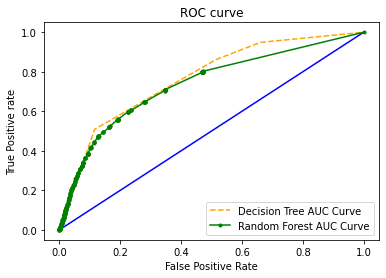

In [15]:
# Separando a variável target do dataset
X = dfBestCorr.drop(columns='TARGET')
y = dfBestCorr['TARGET']

#Fazendo o train test split para obeter variáveis de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Gerando o modelo de árvore.
modelTreeCorr = DecisionTreeClassifier(random_state=0, max_depth=2)
modelTreeCorr = modelTreeCorr.fit(X_train, y_train)
predTreeCorr = modelTreeCorr.predict(X_test)
# Calculando a acurácia
accuracyTree = accuracy_score(y_test, predTreeCorr)
print('Acurácia para DecisionTree: %.3f' % accuracyTree)
# Calculando a métrica auc
pred_prob_Tree = modelTreeCorr.predict_proba(X_test)
aucTree = roc_auc_score(y_test, pred_prob_Tree[:,1])
print('AUC para DecisionTree: %.3f' % aucTree)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_Tree[:,1], pos_label=1)

# Gerando o modelo random forest.
modelRF = RandomForestClassifier(n_estimators=100)
modelRF = modelRF.fit(X_train, y_train)
predRF = modelRF.predict(X_test)
# Calculando a acurácia
accuracyRF = accuracy_score(y_test, predRF)
print('Acurácia para Random Forest: %.3f' % accuracyRF)
# Calculando a métrica auc
pred_prob_RF = modelRF.predict_proba(X_test)
aucRF = roc_auc_score(y_test, pred_prob_RF[:,1])
print('AUC para DecisionTree: %.3f' % aucRF)
fpr2, tpr2, _ = roc_curve(y_test, pred_prob_RF[:,1])

# Gerando o gráfico da curva auc
plt.plot([0, 1], [0, 1], 'blue')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree AUC Curve')
plt.plot(fpr2, tpr2, marker='.',color='green', label='Random Forest AUC Curve')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

O cálculo dos erros nos dois algoritmos são bem próximos, mas podemos ver que a pelo cálculo do AUC o dataset encontra-se desbalanceado, precisamos balancear o modelo antes de tentar outros algoritmos.

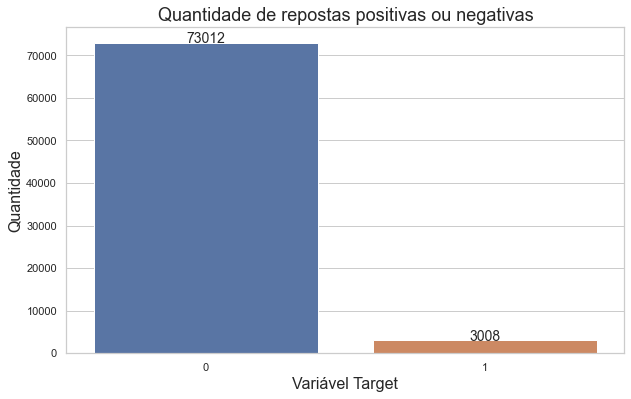

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df_01['TARGET'], data=df_01)
ax.xaxis.set_label_text("Variável Target",fontdict= {'size':16})
ax.yaxis.set_label_text("Quantidade", fontdict={'size':16})
ax.set_title("Quantidade de repostas positivas ou negativas", fontdict={'size':18})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, height ,ha="center", fontdict={'size':14})
plt.show()

## Balanceando o dataset

Para o balanceamento do dataset é importante que o mesmo já esteja divido em treino e teste, preservando, assim os dados de teste e impedindo que eles fiquem enviessados. Esse método será feito com o pacote SMOTE.

In [17]:
#!pip install imbalanced-learn
# Carregando a biblioteca SMOTE que fará o balanceamento dos dados
from imblearn.over_sampling import SMOTE

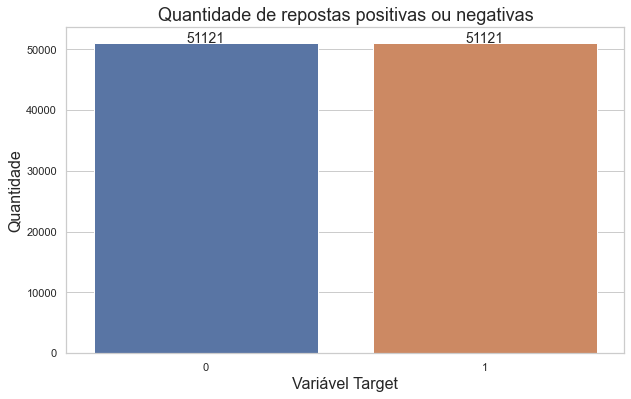

In [18]:
# Dividido o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Criando os X e y balanceados
X_resampled, y_resampled = SMOTE(random_state=1).fit_sample(X_train, y_train)

# Gráfico para visualizar os dados divididos.
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=y_resampled)
ax.xaxis.set_label_text("Variável Target",fontdict= {'size':16})
ax.yaxis.set_label_text("Quantidade", fontdict={'size':16})
ax.set_title("Quantidade de repostas positivas ou negativas", fontdict={'size':18})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, height ,ha="center", fontdict={'size':14})
plt.show()

Agora que as variáveis estão balanceadas podemos criar o modelo novamente.

Acurácia para DecisionTree: 0.853
AUC para DecisionTree: 0.763
Acurácia para Random Forest: 0.912
AUC para Random Forest: 0.758


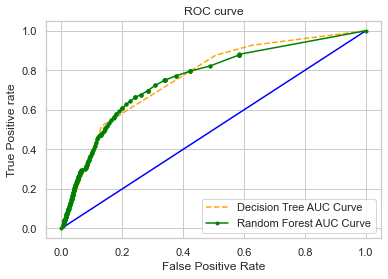

In [19]:
X_train = X_resampled
y_train = y_resampled

# Gerando o modelo de árvore.
modelTreeCorr = DecisionTreeClassifier(random_state=0, max_depth=2)
modelTreeCorr = modelTreeCorr.fit(X_train, y_train)
predTreeCorr = modelTreeCorr.predict(X_test)
# Calculando a acurácia
accuracyTree = accuracy_score(y_test, predTreeCorr)
print('Acurácia para DecisionTree: %.3f' % accuracyTree)
# Calculando a métrica auc
pred_prob_Tree = modelTreeCorr.predict_proba(X_test)
aucTree = roc_auc_score(y_test, pred_prob_Tree[:,1])
print('AUC para DecisionTree: %.3f' % aucTree)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_Tree[:,1], pos_label=1)

# Gerando o modelo random forest.
modelRF = RandomForestClassifier(n_estimators=100)
modelRF = modelRF.fit(X_train, y_train)
predRF = modelRF.predict(X_test)
# Calculando a acurácia
accuracyRF = accuracy_score(y_test, predRF)
print('Acurácia para Random Forest: %.3f' % accuracyRF)
# Calculando a métrica auc
pred_prob_RF = modelRF.predict_proba(X_test)
aucRF = roc_auc_score(y_test, pred_prob_RF[:,1])
print('AUC para Random Forest: %.3f' % aucRF)
fpr2, tpr2, _ = roc_curve(y_test, pred_prob_RF[:,1])

# Gerando o gráfico da curva auc
plt.plot([0, 1], [0, 1], 'blue')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree AUC Curve')
plt.plot(fpr2, tpr2, marker='.',color='green', label='Random Forest AUC Curve')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

O modelo melhorou um pouco, mas ainda não é o suficiente, vamos testar outras ferramentas e ver qual obterá o melhor resultado para o problema, mas antes iremos carregar o dataset de teste para ver o resultado no kaggle.

In [20]:
test = pd.read_csv("test.csv")
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

Preparando os dados do dataset de teste.|

In [21]:
cols_test = vars_corr
cols_test.remove('TARGET')
test_pred = test[cols_test]
test_predRF = modelRF.predict(test_pred)
test_predRF[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [22]:
#Criando a série com a resposta.
predict1 = pd.Series(test_predRF, index=test["ID"])
predict1.name = 'TARGET'
predict1.to_csv('predict1.csv', header=True)
#Mostrando os 5 primeiros elementos da série.
!head -n5 predict1.csv

ID,TARGET
2,0
5,0
6,0
7,0


O resultado dado no kaggle não foi muito satisftório (score = 0.63), logo vamos tentar melhorar as features selections para obter resultados mais expressivos no ranking do kaggle.

## Feature selection utilizando SelectKBest

Nesta segunda tentativa vamos utilizar o método SelectKbest para fazer a feature selection do modelo. Este método faz a seleção também baseada na correlação entre as variáveis, mas ao contrário da primeira tentativa ele também leva em consideração a correlação entre outras variáveis e não somente o a variável target.

Antes de utilizar o método vamos também utilizar a biblioteca VarianceThreshold que remove as features com variância muito baixas, neste caso vou utilizar o treshold=0, assim removerá as variáveis com as mesmas variáveis entre elas. No primeiro modelo fora removidas apenas variáveis com valores todos iguais a 0, neste caso serão removidas features com vairáveis iguais, não importando se é apenas 0.

In [23]:
#import numpy as np
#np.seterr(divide='ignore', invalid='ignore')
X = df.drop(columns='TARGET')
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Carregando a biblioteca
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
# Colunas que serão removidas
constant_columns = [column for column in X_train.columns
                if column not in
X_train.columns[constant_filter.get_support()]]
X_train = constant_filter.transform(X_train)
X_test = constant_filter.transform(X_test)
print('Número de colunas excluídas: {}' .format(len(constant_columns)))
for column in constant_columns:
    print("Removed ", column)

Número de colunas excluídas: 46
Removed  ind_var2_0
Removed  ind_var2
Removed  ind_var18_0
Removed  ind_var18
Removed  ind_var27_0
Removed  ind_var28_0
Removed  ind_var28
Removed  ind_var27
Removed  ind_var41
Removed  ind_var46_0
Removed  ind_var46
Removed  num_var18_0
Removed  num_var18
Removed  num_var27_0
Removed  num_var28_0
Removed  num_var28
Removed  num_var27
Removed  num_var41
Removed  num_var46_0
Removed  num_var46
Removed  saldo_var18
Removed  saldo_var28
Removed  saldo_var27
Removed  saldo_var41
Removed  saldo_var46
Removed  delta_imp_amort_var18_1y3
Removed  delta_imp_reemb_var33_1y3
Removed  delta_num_reemb_var33_1y3
Removed  imp_amort_var18_hace3
Removed  imp_amort_var18_ult1
Removed  imp_amort_var34_hace3
Removed  imp_reemb_var13_hace3
Removed  imp_reemb_var33_hace3
Removed  imp_reemb_var33_ult1
Removed  imp_trasp_var17_out_hace3
Removed  imp_trasp_var33_out_hace3
Removed  num_var2_0_ult1
Removed  num_var2_ult1
Removed  num_reemb_var13_hace3
Removed  num_reemb_var33_hace

## Balanceando o dataset

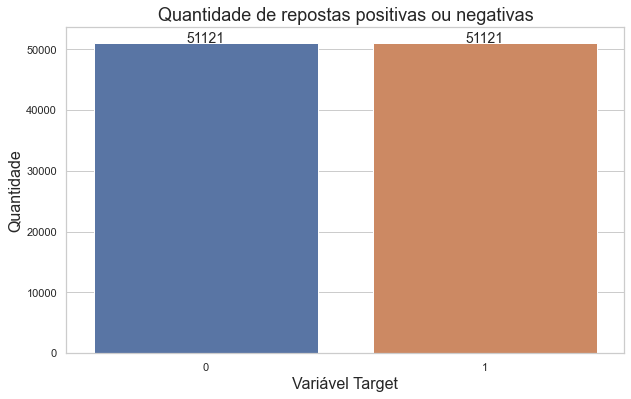

In [24]:
X_resampled, y_resampled = SMOTE(random_state=1).fit_sample(X_train, y_train)

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=y_resampled)
ax.xaxis.set_label_text("Variável Target",fontdict= {'size':16})
ax.yaxis.set_label_text("Quantidade", fontdict={'size':16})
ax.set_title("Quantidade de repostas positivas ou negativas", fontdict={'size':18})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, height ,ha="center", fontdict={'size':14})
plt.show()

Agora que o dataset está limpo vamos fazer a feature selection utilizando o método SelectKBest. Vamos imprimir uma lista que começa com as duas variáveis mais importantes escolhidas pelo modelo até todas as variáveis do dataset e ver qual é o melhor resultado com as k variáveis escolhidas.

In [25]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif

In [26]:
list_k = []

for k in range(2, X_train.shape[1], 10):
    selector = SelectKBest(score_func=f_classif, k=k)

    X_train2 = selector.fit_transform(X_resampled, y_resampled)
    X_test2 = selector.transform(X_test)

    modelRF = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelRF.fit(X_train2, y_resampled)

    predRF = modelRF.predict(X_test2)

    accuracyRF = accuracy_score(y_test, predRF)
    print('k = {} - Acuracy = {}' .format(k, accuracyRF))

    predRF_AUC= modelRF.predict_proba(X_test2)
    aucRF = roc_auc_score(y_test, predRF_AUC[:,1])
    print('k = {} - AUC = {}' .format(k, aucRF))

    list_k.append(aucRF)

k = 2 - Acuracy = 0.7528720512145927
k = 2 - AUC = 0.6341478008403783
k = 12 - Acuracy = 0.9573796369376479
k = 12 - AUC = 0.7118176419533141
k = 22 - Acuracy = 0.9562395860738402
k = 22 - AUC = 0.7476120510637279
k = 32 - Acuracy = 0.956502674734719
k = 32 - AUC = 0.7512333711011812
k = 42 - Acuracy = 0.9571165482767693
k = 42 - AUC = 0.7464504089187038
k = 52 - Acuracy = 0.9575550293782338
k = 52 - AUC = 0.7447076211922309
k = 62 - Acuracy = 0.9391826712268702
k = 62 - AUC = 0.7539238497343896
k = 72 - Acuracy = 0.9396211523283347
k = 72 - AUC = 0.7516210843940407
k = 82 - Acuracy = 0.9396650004384811
k = 82 - AUC = 0.7510102587259829
k = 92 - Acuracy = 0.9421643427168289
k = 92 - AUC = 0.7449100398821483
k = 102 - Acuracy = 0.9443567482241515
k = 102 - AUC = 0.7505960355492052
k = 112 - Acuracy = 0.9436113303516619
k = 112 - AUC = 0.7483234745022096
k = 122 - Acuracy = 0.943918267122687
k = 122 - AUC = 0.7461235535326167
k = 132 - Acuracy = 0.9443567482241515
k = 132 - AUC = 0.74926

## Imprimindo o resultados das k variáveis

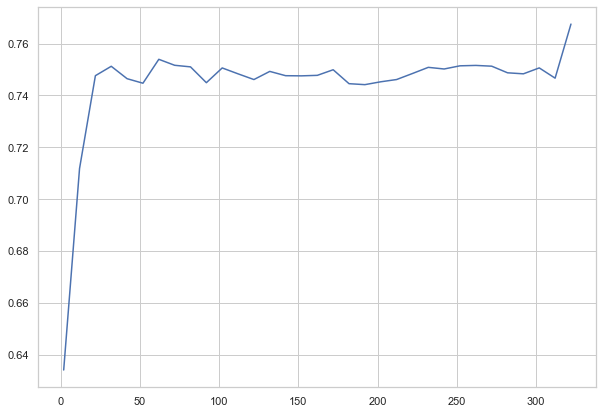

In [27]:
pd.Series(list_k, index=range(2, X_train.shape[1], 10)).plot(figsize=(10,7))

Podemos ver que a partir de 20 features os resutados são bem semelhantes neste método, portanto vou treinar o modelo com 70 features para ver como o resultado fica no kaggle.

k = 70 - Acuracy = 0.9391388231167237
k = 70 - AUC = 0.7518087254462185


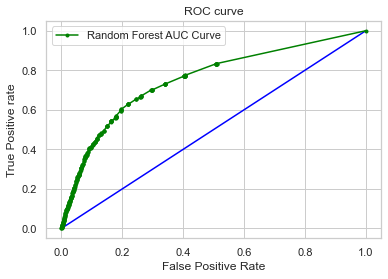

In [28]:
k = 70
selector = SelectKBest(score_func=f_classif, k=k)

X_train2 = selector.fit_transform(X_resampled, y_resampled)
X_test2 = selector.transform(X_test)

modelRF = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelRF.fit(X_train2, y_resampled)

predRF = modelRF.predict(X_test2)

accuracyRF = accuracy_score(y_test, predRF)
print('k = {} - Acuracy = {}' .format(k, accuracyRF))

predRF_AUC= modelRF.predict_proba(X_test2)
aucRF = roc_auc_score(y_test, predRF_AUC[:,1])
print('k = {} - AUC = {}' .format(k, aucRF))

fpr2, tpr2, _ = roc_curve(y_test, predRF_AUC[:,1])
plt.plot([0, 1], [0, 1], 'blue')
plt.plot(fpr2, tpr2, marker='.',color='green', label='Random Forest AUC Curve')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Podemos perceber que o resultado ficou um pouco pior do que na primeira predição, mas a diferença é bem pouco, de qualquer forma, não é um resultado satisfatório.

In [29]:
test = pd.read_csv("test.csv")
test_pred = test.drop(columns=constant_columns)

mask = selector.get_support()
test_pred = test_pred.iloc[:, mask]
test_pred.shape

(75818, 70)

In [30]:
test_predRF = modelRF.predict(test_pred)

#Criando a série com a resposta.
predict2 = pd.Series(test_predRF, index=test["ID"])
predict2.name = 'TARGET'
predict2.to_csv('predict2.csv', header=True)
#Mostrando os 5 primeiros elementos da série.
!head -n5 predict2.csv

ID,TARGET
2,0
5,0
6,0
7,0


Este método não foi satisfatório para o kaggle, conseguindo apenas 0,56 de erro na métrica AUC. Vamos tentar utilizar outros métodos para melhorar a resposta do problema.

## Método Embedded

Utilizando as mesmas features do dataset anterior vamos utilizar um método embedde para fazer a feature selection. Este método utliza modelos essemble para descobrir quais são as variáeis que mais influenciam no modelo utilizado. Para isso iremos carregar o pacote SelectFromModel, que seleciona as variáveis do modelo.

In [31]:
from sklearn.feature_selection import SelectFromModel

Vamos utilizar o método random forest classifiers com 100 árvores.

In [32]:
X_train = X_resampled
y_train = y_resampled
print('Before: {}' .format(X_train.shape))
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
clf.fit(X_train, y_train)

model = SelectFromModel(clf, prefit=True)
X_new_train = model.transform(X_train)

print('After: {}' .format(X_new_train.shape))

Before: (102242, 324)
After: (102242, 42)


O método reduziu a número de variáeis de 324 para 42. Vamos testar o modelo e ver qual é o resultado dado.

In [33]:
X_new_test = model.transform(X_test)
modelRF = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelRF.fit(X_new_train, y_train)

predRF = modelRF.predict(X_new_test)

accuracyRF = accuracy_score(y_test, predRF)
print('Acuracy = {}' .format(accuracyRF))

predRF_AUC= modelRF.predict_proba(X_new_test)
aucRF = roc_auc_score(y_test, predRF_AUC[:,1])
print('AUC = {}' .format(aucRF))

Acuracy = 0.9491361922301149
AUC = 0.7700884885946342


Obtemos uma métrica um pouco melhor do que as vistas anteriormente. Agora vamos carregar o dataset de treino para carregar no kaggle

In [34]:
test = pd.read_csv("test.csv")
test_pred = test.drop(columns=constant_columns)
test_pred = model.transform(test_pred)
test_pred.shape

(75818, 42)

In [35]:
test_predRF = modelRF.predict(test_pred)

#Criando a série com a resposta.
predict3 = pd.Series(test_predRF, index=test["ID"])
predict3.name = 'TARGET'
predict3.to_csv('predict3.csv', header=True)
#Mostrando os 5 primeiros elementos da série.
!head -n5 predict3.csv

ID,TARGET
2,0
5,0
6,0
7,0


Este resultado também não foi satisfatório (0.53). Vamos utilizar outro método essemble e ver se o resultado fica melhor.

## Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
X_train = X_resampled
y_train = y_resampled
print('Before: {}' .format(X_train.shape))
clf = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

model = SelectFromModel(clf, prefit=True)
X_new_train = model.transform(X_train)

print('After: {}' .format(X_new_train.shape))

Before: (102242, 324)
After: (102242, 24)


In [38]:
X_new_test = model.transform(X_test)

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    modelGB = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    modelGB.fit(X_new_train, y_train)
    predGB = modelGB.predict(X_new_test)
    accuracyGB = accuracy_score(y_test, predGB)
    print('Learning rate: {} - Acuracy = {}' .format(learning_rate, accuracyGB))
    predGB_AUC= modelGB.predict_proba(X_new_test)
    aucGB = roc_auc_score(y_test, predGB_AUC[:,1])
    print('Learning rate: {} - Auc = {}' .format(learning_rate, aucGB))

Learning rate: 0.05 - Acuracy = 0.7406384284837324
Learning rate: 0.05 - Auc = 0.7588856163410719
Learning rate: 0.075 - Acuracy = 0.7394545295097781
Learning rate: 0.075 - Auc = 0.7565580884726189
Learning rate: 0.1 - Acuracy = 0.853064982899237
Learning rate: 0.1 - Auc = 0.7569982973265705
Learning rate: 0.25 - Acuracy = 0.8524072612470402
Learning rate: 0.25 - Auc = 0.7685814940541227
Learning rate: 0.5 - Acuracy = 0.8697711128650355
Learning rate: 0.5 - Auc = 0.7802506856499403
Learning rate: 0.75 - Acuracy = 0.8784530386740331
Learning rate: 0.75 - Auc = 0.7783572009656388
Learning rate: 1 - Acuracy = 0.878146101903008
Learning rate: 1 - Auc = 0.7658953588482229


Podemos ver que o melhor learning rate é de 0.5, portanto vamos rodar o modelo com essa taxa e ver o resultado no kaggle.

In [39]:
modelGB = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
modelGB.fit(X_new_train, y_train)
predGB = modelGB.predict(X_new_test)

In [40]:
test = pd.read_csv("test.csv")
test_pred = test.drop(columns=constant_columns)
test_pred = model.transform(test_pred)
test_pred.shape

(75818, 24)

In [41]:
test_predGB = modelGB.predict(test_pred)

#Criando a série com a resposta.
predict4 = pd.Series(test_predGB, index=test["ID"])
predict4.name = 'TARGET'
predict4.to_csv('predict4.csv', header=True)
#Mostrando os 5 primeiros elementos da série.
!head -n5 predict4.csv

ID,TARGET
2,0
5,0
6,0
7,0


Com esse modelo conseguimos um score de 0.70 com os dados de teste do kaggle, um resultado bem satisfatório comparado aos anterires.

O ideal para fazer uma análise exploratória é conhecer bem o dados que temos, neste caso não foi possível devido à disponibização dos dados, as variáeis estão todas nomeados com código e também existem muitas variáveis. Portanto resolvi utilizar algumns métodos para computacionais para fazer a feature selection. Existem outras bibliotecas mais robustas para fazer a feature selection, como o RFE, mas como temos muitas variáveis neste dataset o tempo computacional fica inviável. Os métos utilizado até neste projeto obtiveram bons resultados com um tempo computacional viável, portanto foram satisfatórios para este projeto.

Podemos fazer algumas coisas que podem melhorar o resultado como a normalização dos dados, mas fico feliz com o resultado obtido até o momento.